In [30]:
import pandas as pd
import umap
import umap.plot
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
import numpy as np

In [82]:
base_model_path = '/neurospin/dico/data/deep_folding/current/models/Champollion_V0'
bdd_path = f'{base_model_path}/SC-sylv_right/11-43-38_3/ukb40_random_epoch100_embeddings/full_embeddings.csv'

#bdd_path = '/neurospin/dico/jlaval/Output/SC-sylv_right_V1/V1_TrimExtremities_p80/ukb40_random_embeddings/full_embeddings.csv'

bdd_ukb = pd.read_csv(bdd_path, index_col=0) 
bdd_ukb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-37.629620,6.583590,29.279840,-16.611984,-30.081190,-24.476210,11.042302,-6.784241,19.132568,10.150197,...,-2.848078,11.085325,-12.354747,-76.037210,-8.468971,-29.602938,-24.906027,-16.344492,7.703534,-1.050617
sub-1000325,11.934219,11.355382,-13.496794,-38.996407,14.297873,-5.811631,6.174108,-45.331050,9.762536,44.107750,...,4.212949,6.075599,-36.018467,-134.833560,26.447592,-35.490543,4.641970,-4.289551,-58.478560,-31.515226
sub-1000458,-25.394463,4.755465,-22.513622,-25.682335,-67.619896,-18.027046,-30.610876,51.657852,-18.840885,-7.459018,...,-9.459454,-0.912658,32.695583,12.509913,10.790437,-25.991050,-39.407890,-13.558734,47.675068,-0.354762
sub-1000575,-25.367662,-23.005732,-30.035063,36.237038,-103.579190,-9.643719,4.125421,34.603440,19.479185,-13.243917,...,20.220034,-5.049628,4.961305,-25.468930,25.991018,3.052118,-73.673270,6.855866,30.889896,43.402153
sub-1000606,-35.599197,-2.058082,26.222765,-3.495081,-49.495464,-3.061627,-14.236676,-3.899254,-15.054834,50.399190,...,8.652889,27.369568,34.453293,-73.026400,40.409150,28.420736,-51.241203,17.027500,-0.707319,-20.734170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023847,-37.472730,15.076828,40.302013,14.211771,-52.055767,-15.010591,24.076330,3.206335,-1.258591,3.071922,...,-27.618910,-8.819694,-1.909710,-5.518399,5.431972,28.059300,-48.179085,-25.551464,16.702429,83.777750
sub-6024038,-42.081875,-9.341934,9.514158,0.258455,-50.931040,-28.246084,15.095071,26.785662,0.647673,-32.062424,...,12.599731,18.422710,36.767235,-8.001195,41.257580,1.825518,-52.350716,-10.308723,0.672867,34.854374
sub-6024150,-33.061190,3.562302,41.779350,-38.799210,-13.047621,-14.812035,11.580236,-15.779822,14.094276,23.860043,...,-1.073854,25.488443,-39.752476,-69.233630,-33.353798,-20.189638,24.925224,-8.327268,-22.792067,-12.492115


In [83]:
labelled_CS = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/interrupted_SC_labelled.csv')
labelled_CS

,ID,Interruption
0,sub-1376904,1
1,sub-3694216,1
2,sub-1037052,1
3,sub-3250551,1
4,sub-5401486,1
...,...,...
520,sub-1340306,0
521,sub-1691707,0
522,sub-3314602,0
523,sub-5412919,0


In [ ]:
## generate the two files for embedding pipeline..
labels = labelled_CS.copy()
labels.columns=['Subject', 'Interruption_SC_right']
labels.to_csv('/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/interrupted_SC_labels.csv', index=False)

subjects = labels['Subject']
subjects.to_csv('/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/interrupted_SC_subjects.csv', index=False, header=None)

In [84]:
list_interrupted_CS = labelled_CS[labelled_CS.Interruption==1].ID.to_list()
list_color = ['g' if i not in list_interrupted_CS else 'r' for i in bdd_ukb.index]
list_size = [0.1 if i not in list_interrupted_CS else 30 for i in bdd_ukb.index]
list_alpha = [0.3 if i not in list_interrupted_CS else 1 for i in bdd_ukb.index]
list_label = [0 if i not in list_interrupted_CS else 1 for i in bdd_ukb.index]

In [7]:
umap_reducer = umap.UMAP(densmap=True, dens_lambda=5, random_state=42)

umap_reducer.fit(bdd_ukb)
embedding2D_ukb = umap_reducer.transform(bdd_ukb)

/neurospin/dico/jlaval/Runs_jl277509/2023_jlaval_STSbabies/venv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/neurospin/dico/jlaval/Runs_jl277509/2023_jlaval_STSbabies/venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


/tmp/ipykernel_2513814/3185741944.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


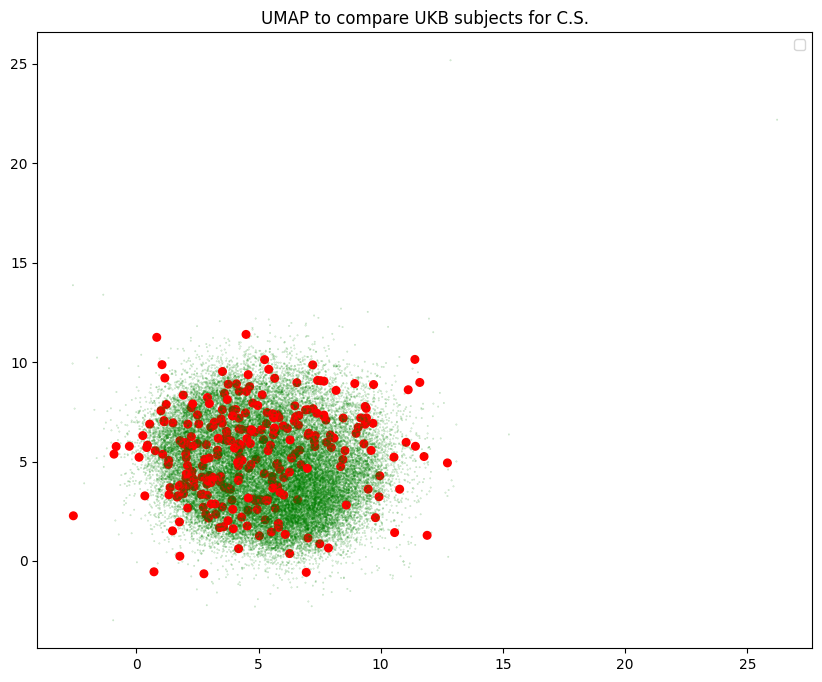

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(embedding2D_ukb[:,0], embedding2D_ukb[:,1], c=list_color, s=list_size, alpha=list_alpha)
plt.title('UMAP to compare UKB subjects for C.S.')
plt.legend()
plt.show()

# OneClassSVM

In [47]:
dims = [f'dim{k}' for k in range(1,33)]
X = bdd_ukb[dims]
model = OneClassSVM(gamma='auto')

In [48]:
clf = model.fit(X)

In [49]:
y_pred = clf.predict(X)

In [50]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([42419,    14]))

In [51]:
## pred -1 (outliers) -> 1, pred 1 (inliers) -> 0
y_pred_reformat = [1 if v==-1 else 0 for v in y_pred]

In [52]:
np.unique(y_pred_reformat, return_counts=True)

(array([0, 1]), array([   14, 42419]))

In [53]:
print(f'Number of interrupted subjects : {np.sum(list_label)}')
tn, fp, fn, tp = confusion_matrix(list_label, y_pred_reformat).ravel()
print(f'tn : {tn}, fp : {fp}, fn : {fn}, tp : {tp}')

Number of interrupted subjects : 272
tn : 13, fp : 42148, fn : 1, tp : 271


# Linear classification

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

model = LogisticRegression(C=0.01, solver='liblinear', penalty='l2',
                                       max_iter=10000,
                                       random_state=42)

In [86]:
val = cross_val_predict(model, X.to_numpy(), list_label, cv=5, method='predict_proba')

In [87]:
roc_auc_score(list_label, val[:,1])

np.float64(0.9690097274174488)